# **Bike Sharing Assignment** 
author : `@amangupta - amu.aman19@gmail.com`


## Problem Statement : 

- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
- They want to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands

### Data Dictionary 

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1]:
# importing libraries
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## **Data Extraction and Preprocessing**

In [2]:
#  reading dataset 
bike_sharing = pd.read_csv('day.csv')

# Displaying first 5 rows of the data
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking shape
bike_sharing.shape

(730, 16)

In [4]:
# checking info - to get null value check and datatype 
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# dropping duplicates from dataset if any 
bike_sharing.drop_duplicates( inplace=True)

In [6]:
# No duplicates found
bike_sharing.shape

(730, 16)

In [7]:
bike_sharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# converting dteday to dataframe time so that I can verify what weekday 0,1,2,3,4,5,6 means
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'],format="%d-%m-%Y")

In [9]:
bike_sharing.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [10]:
# creating a new column just to verify weekday mapping 
bike_sharing['day'] = bike_sharing['dteday'].dt.day_name()

In [11]:
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Monday
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Tuesday
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Wednesday
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Thursday
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,Friday
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,Saturday
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,Sunday
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,Monday


- I can verify that mapping for weekday is {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}

- Dropping columns from dataset : 
  
1. instant - an index column
2. casual - Not required as already included in total -> cnt
3. registered -  Not required as already included in total -> cnt
4. dteday - We aleady have columns yr, mnth, weekday so we can drop

In [12]:
bike_sharing = bike_sharing.drop(['instant','casual','registered','dteday'],axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Monday
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Tuesday
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Wednesday
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Thursday
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Friday


In [13]:
# Getting statistics for dataset :
bike_sharing.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
1%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.985470,7.290493,31.209593,3.548993,689.380000
10%,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,10.653165,12.752280,45.000000,6.704754,1742.600000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
90%,4.000000,1.000000,11.000000,0.000000,6.000000,1.000000,2.000000,29.998347,33.908210,81.762500,19.833997,7293.800000


# **Exploration Data Analysis**

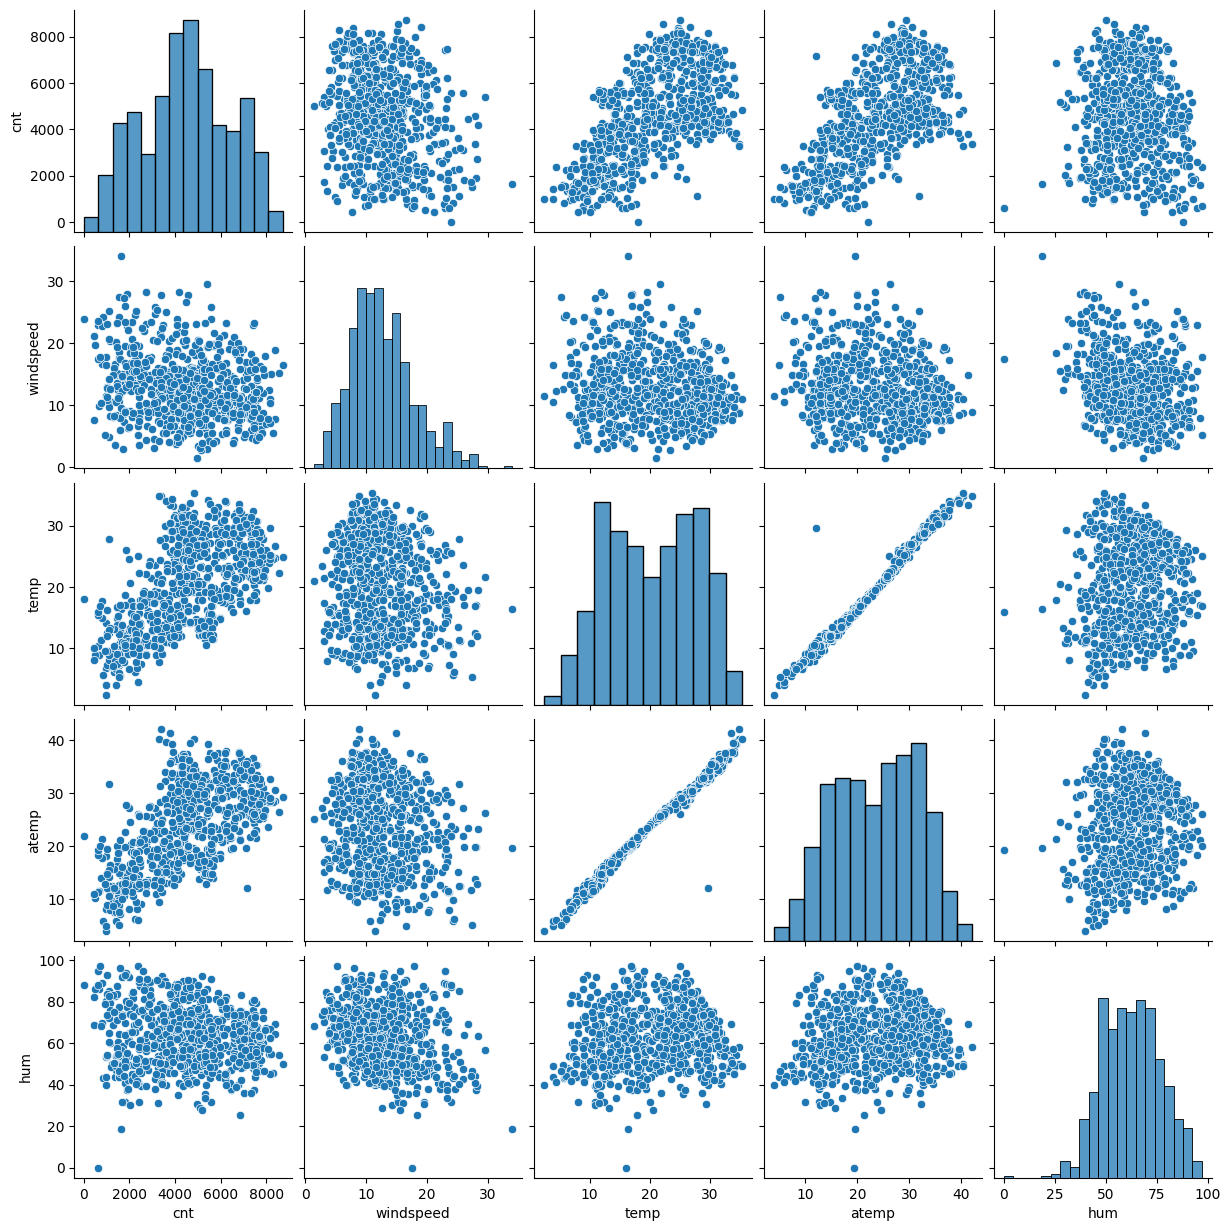

In [14]:
sns.pairplot(data = bike_sharing, vars=['cnt', 'windspeed', 'temp', 'atemp', 'hum'])
plt.show()

## **Inference** 

- By Visualising Data (Pairplot) - We can say that the relationship between all the variables is not linear. But the relationship between temp and atemp seems to be highly positively correlated and linear so therefore we can give a try to linear model here.
- As our outcome/target variable is continuous so we will go with Multiple Linear Regression

- Converting categorical values to categorical strings for better analysis
- categorical variables : `season,  yr, mnth, holiday, weekday, working day, weathersit`

In [15]:
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

yr_dict = {0:'2018', 1:'2019'}

month_dict = {1:'january', 2:'february', 3:'march', 4:'april', 5:'may',6:'june',7:'july', 8:'august', 
              9:'september', 10:'october', 11:'november', 12:'december'}

holiday_dict = {0:'No', 1:'Yes'}

# - already created day column will use that for EDA 
# weekday_dict = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'} 

workingday_dict = {1:'yes',0:'no'}

weathersit_dict = {1:'Clear',2:'Mist',3:'Light Snow', 4:'Heavy Rain'}


In [16]:
bike_sharing['season_string'] = bike_sharing['season'].map(season_dict)
bike_sharing['yr_string'] = bike_sharing['yr'].map(yr_dict)
bike_sharing['month_string'] = bike_sharing['mnth'].map(month_dict)
bike_sharing['holiday_string'] = bike_sharing['holiday'].map(holiday_dict)
bike_sharing['workingday_string'] = bike_sharing['workingday'].map(workingday_dict)
bike_sharing['weathersit_string'] = bike_sharing['weathersit'].map(weathersit_dict)

In [17]:
bike_sharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,season_string,yr_string,month_string,holiday_string,workingday_string,weathersit_string
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Monday,spring,2018,january,No,no,Mist
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Tuesday,spring,2018,january,No,no,Mist
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Wednesday,spring,2018,january,No,yes,Clear
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Thursday,spring,2018,january,No,yes,Clear
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Friday,spring,2018,january,No,yes,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,Friday,spring,2019,december,No,yes,Mist
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,Saturday,spring,2019,december,No,yes,Mist
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,Sunday,spring,2019,december,No,no,Mist
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,Monday,spring,2019,december,No,no,Clear


In [18]:
# checking total count sum or total bikes rented year wise 
bike_sharing.groupby('yr_string')['cnt'].sum()

yr_string
2018    1243103
2019    2047742
Name: cnt, dtype: int64

# Data Visualizations 

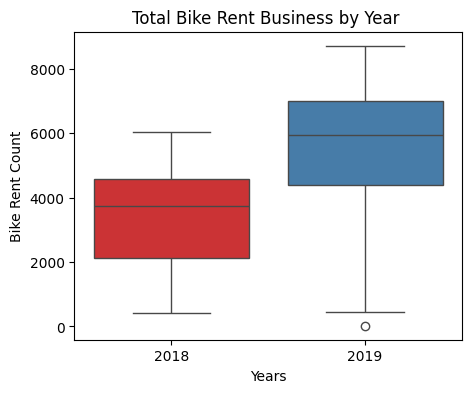

In [19]:
# Analysis 1 : 
# - Demand of business (Total bikes rented)  growing/decling year by year

plt.figure(figsize=(5,4))
sns.boxplot(data=bike_sharing,x = 'yr_string',y='cnt',palette='Set1')
plt.title('Total Bike Rent Business by Year ')
plt.xlabel('Years')
plt.ylabel( 'Bike Rent Count')
plt.show()

## **Inference**

- The overall bike rental business seems to have increased from 2018 to 2019, supported by the higher median and larger range of values in 2019.

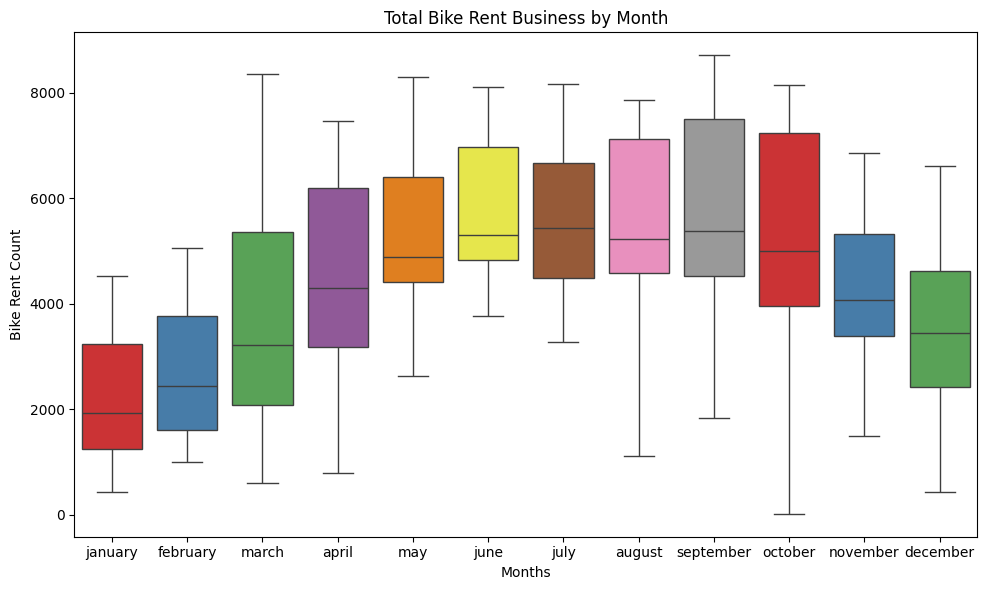

In [20]:
# Analysis 2 : Month wise analysis of business 

plt.figure(figsize=(10,6))
sns.boxplot(data=bike_sharing,x ='month_string',y='cnt',palette='Set1')
plt.title('Total Bike Rent Business by Month')
plt.xlabel('Months')
plt.ylabel('Bike Rent Count')
plt.tight_layout()
plt.show()


## **Inference**

- bike rental demand is highest during the summer months (July to September) and lowest during the winter months (January, February, November, December). 

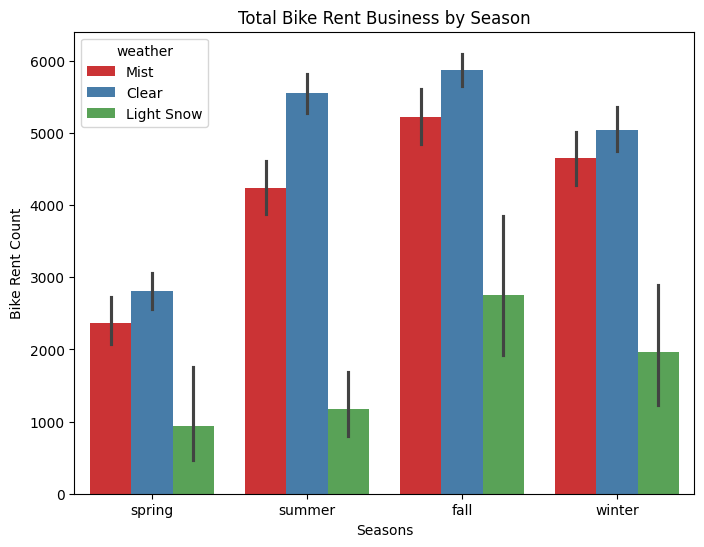

In [21]:
# Analysis 3 : season analysis of business
# This analysis will be used to determine the seasonality of the business

plt.figure(figsize=(8,6))
sns.barplot(data=bike_sharing,x ='season_string',y='cnt',hue = 'weathersit_string',palette='Set1')
plt.title('Total Bike Rent Business by Season')
plt.xlabel('Seasons')
plt.ylabel('Bike Rent Count')
plt.legend(title='weather')
plt.show()

## **Inference**

- Clear weather is the most favorable for bike rentals in all seasons, significantly boosting bike rent counts.
- Light Snow have a negative impact on bike rentals, having the most considerable deterrent effect.
- Summer and fall are the peak seasons for bike rentals, with the highest counts observed during these periods.
- spring shows the lowest bike rent counts, indicating reduced biking activity.

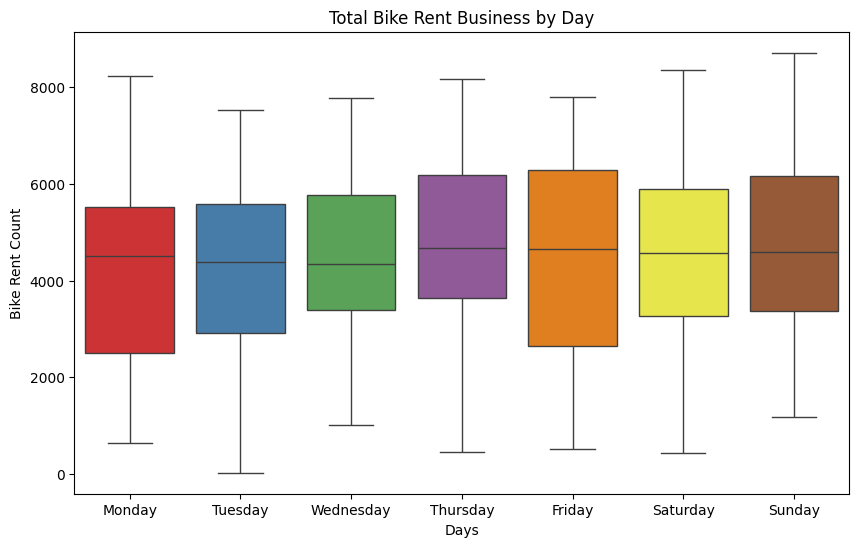

In [22]:
# Day wise analysis of business

plt.figure(figsize=(10,6))
sns.boxplot(data=bike_sharing,x ='day',y='cnt',palette='Set1')
plt.title('Total Bike Rent Business by Day')
plt.xlabel('Days')
plt.ylabel('Bike Rent Count')
plt.show()

## **Inference**
- The bike demand is almost similar throughout the week.

Text(0, 0.5, 'Bike Rent Count')

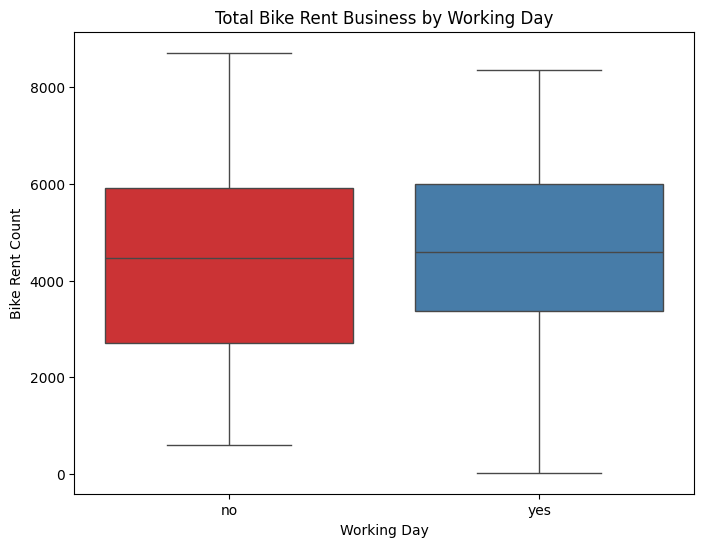

In [23]:
# analysis based on working day or not 

plt.figure(figsize=(8,6))
sns.boxplot(data=bike_sharing,x = 'workingday_string',y='cnt',palette='Set1')
plt.title('Total Bike Rent Business by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Bike Rent Count')

# **Inference**

- Bike rental demand is slightly higher on working days as compared to non-working day.

In [24]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day',
       'season_string', 'yr_string', 'month_string', 'holiday_string',
       'workingday_string', 'weathersit_string'],
      dtype='object')

Text(0, 0.5, 'Bike Rent Count')

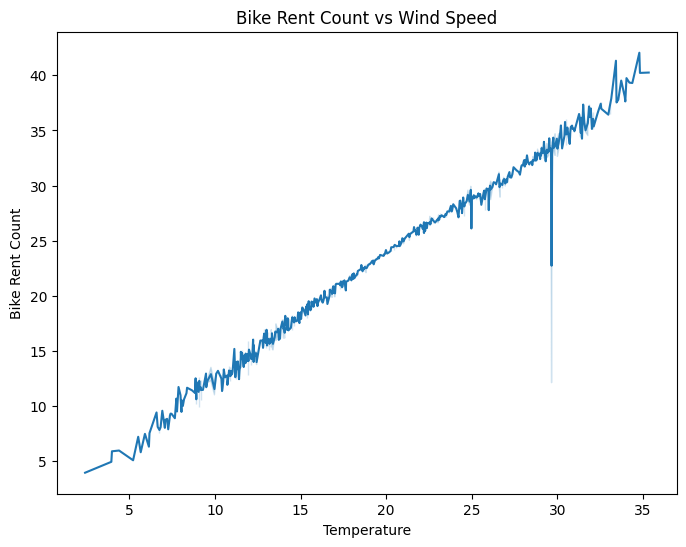

In [25]:
plt.figure(figsize=(8,6))
sns.lineplot(data=bike_sharing,x='temp',y='atemp',palette='Set1')
plt.title('Bike Rent Count vs Wind Speed')
plt.xlabel('Temperature')
plt.ylabel('Bike Rent Count')

## **Inference**

- temperature shows a positive correlation i.e If temperature rises bike rental demand is higher.

## **Data Preparation for Modelling**

In [26]:
#  Step 1 - Removing categorical columns and creating dummy variables for having categorical values more than 2 

bike_sharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,season_string,yr_string,month_string,holiday_string,workingday_string,weathersit_string
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Monday,spring,2018,january,No,no,Mist
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Tuesday,spring,2018,january,No,no,Mist
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Wednesday,spring,2018,january,No,yes,Clear
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Thursday,spring,2018,january,No,yes,Clear
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Friday,spring,2018,january,No,yes,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,Friday,spring,2019,december,No,yes,Mist
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,Saturday,spring,2019,december,No,yes,Mist
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,Sunday,spring,2019,december,No,no,Mist
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,Monday,spring,2019,december,No,no,Clear


In [27]:
bike_sharing.select_dtypes(include=['object']).columns

Index(['day', 'season_string', 'yr_string', 'month_string', 'holiday_string',
       'workingday_string', 'weathersit_string'],
      dtype='object')

In [28]:
# As some of the columns reverse mapped to categories to get better results for EDA now we can drop them for further process
bike_sharing = bike_sharing.drop(['yr_string','season','mnth','weekday','weathersit','holiday_string','workingday_string'],axis=1)

In [29]:
bike_sharing

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_string,month_string,weathersit_string
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,Monday,spring,january,Mist
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Tuesday,spring,january,Mist
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,Wednesday,spring,january,Clear
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,Thursday,spring,january,Clear
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,Friday,spring,january,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,Friday,spring,december,Mist
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,Saturday,spring,december,Mist
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,Sunday,spring,december,Mist
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,Monday,spring,december,Clear


In [30]:
#  Dummy variables required for features - month_string, season_string, wheathersit, day
dummies_features = ['month_string', 'season_string', 'weathersit_string', 'day']
bike_sharing_dummies = pd.get_dummies(bike_sharing,columns=dummies_features,drop_first=True,dtype='int64')

In [31]:
bike_sharing_dummies.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month_string_august,month_string_december,...,season_string_summer,season_string_winter,weathersit_string_Light Snow,weathersit_string_Mist,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# finalised variables for feature selection
bike_sharing_dummies.columns 

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'month_string_august', 'month_string_december',
       'month_string_february', 'month_string_january', 'month_string_july',
       'month_string_june', 'month_string_march', 'month_string_may',
       'month_string_november', 'month_string_october',
       'month_string_september', 'season_string_spring',
       'season_string_summer', 'season_string_winter',
       'weathersit_string_Light Snow', 'weathersit_string_Mist', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

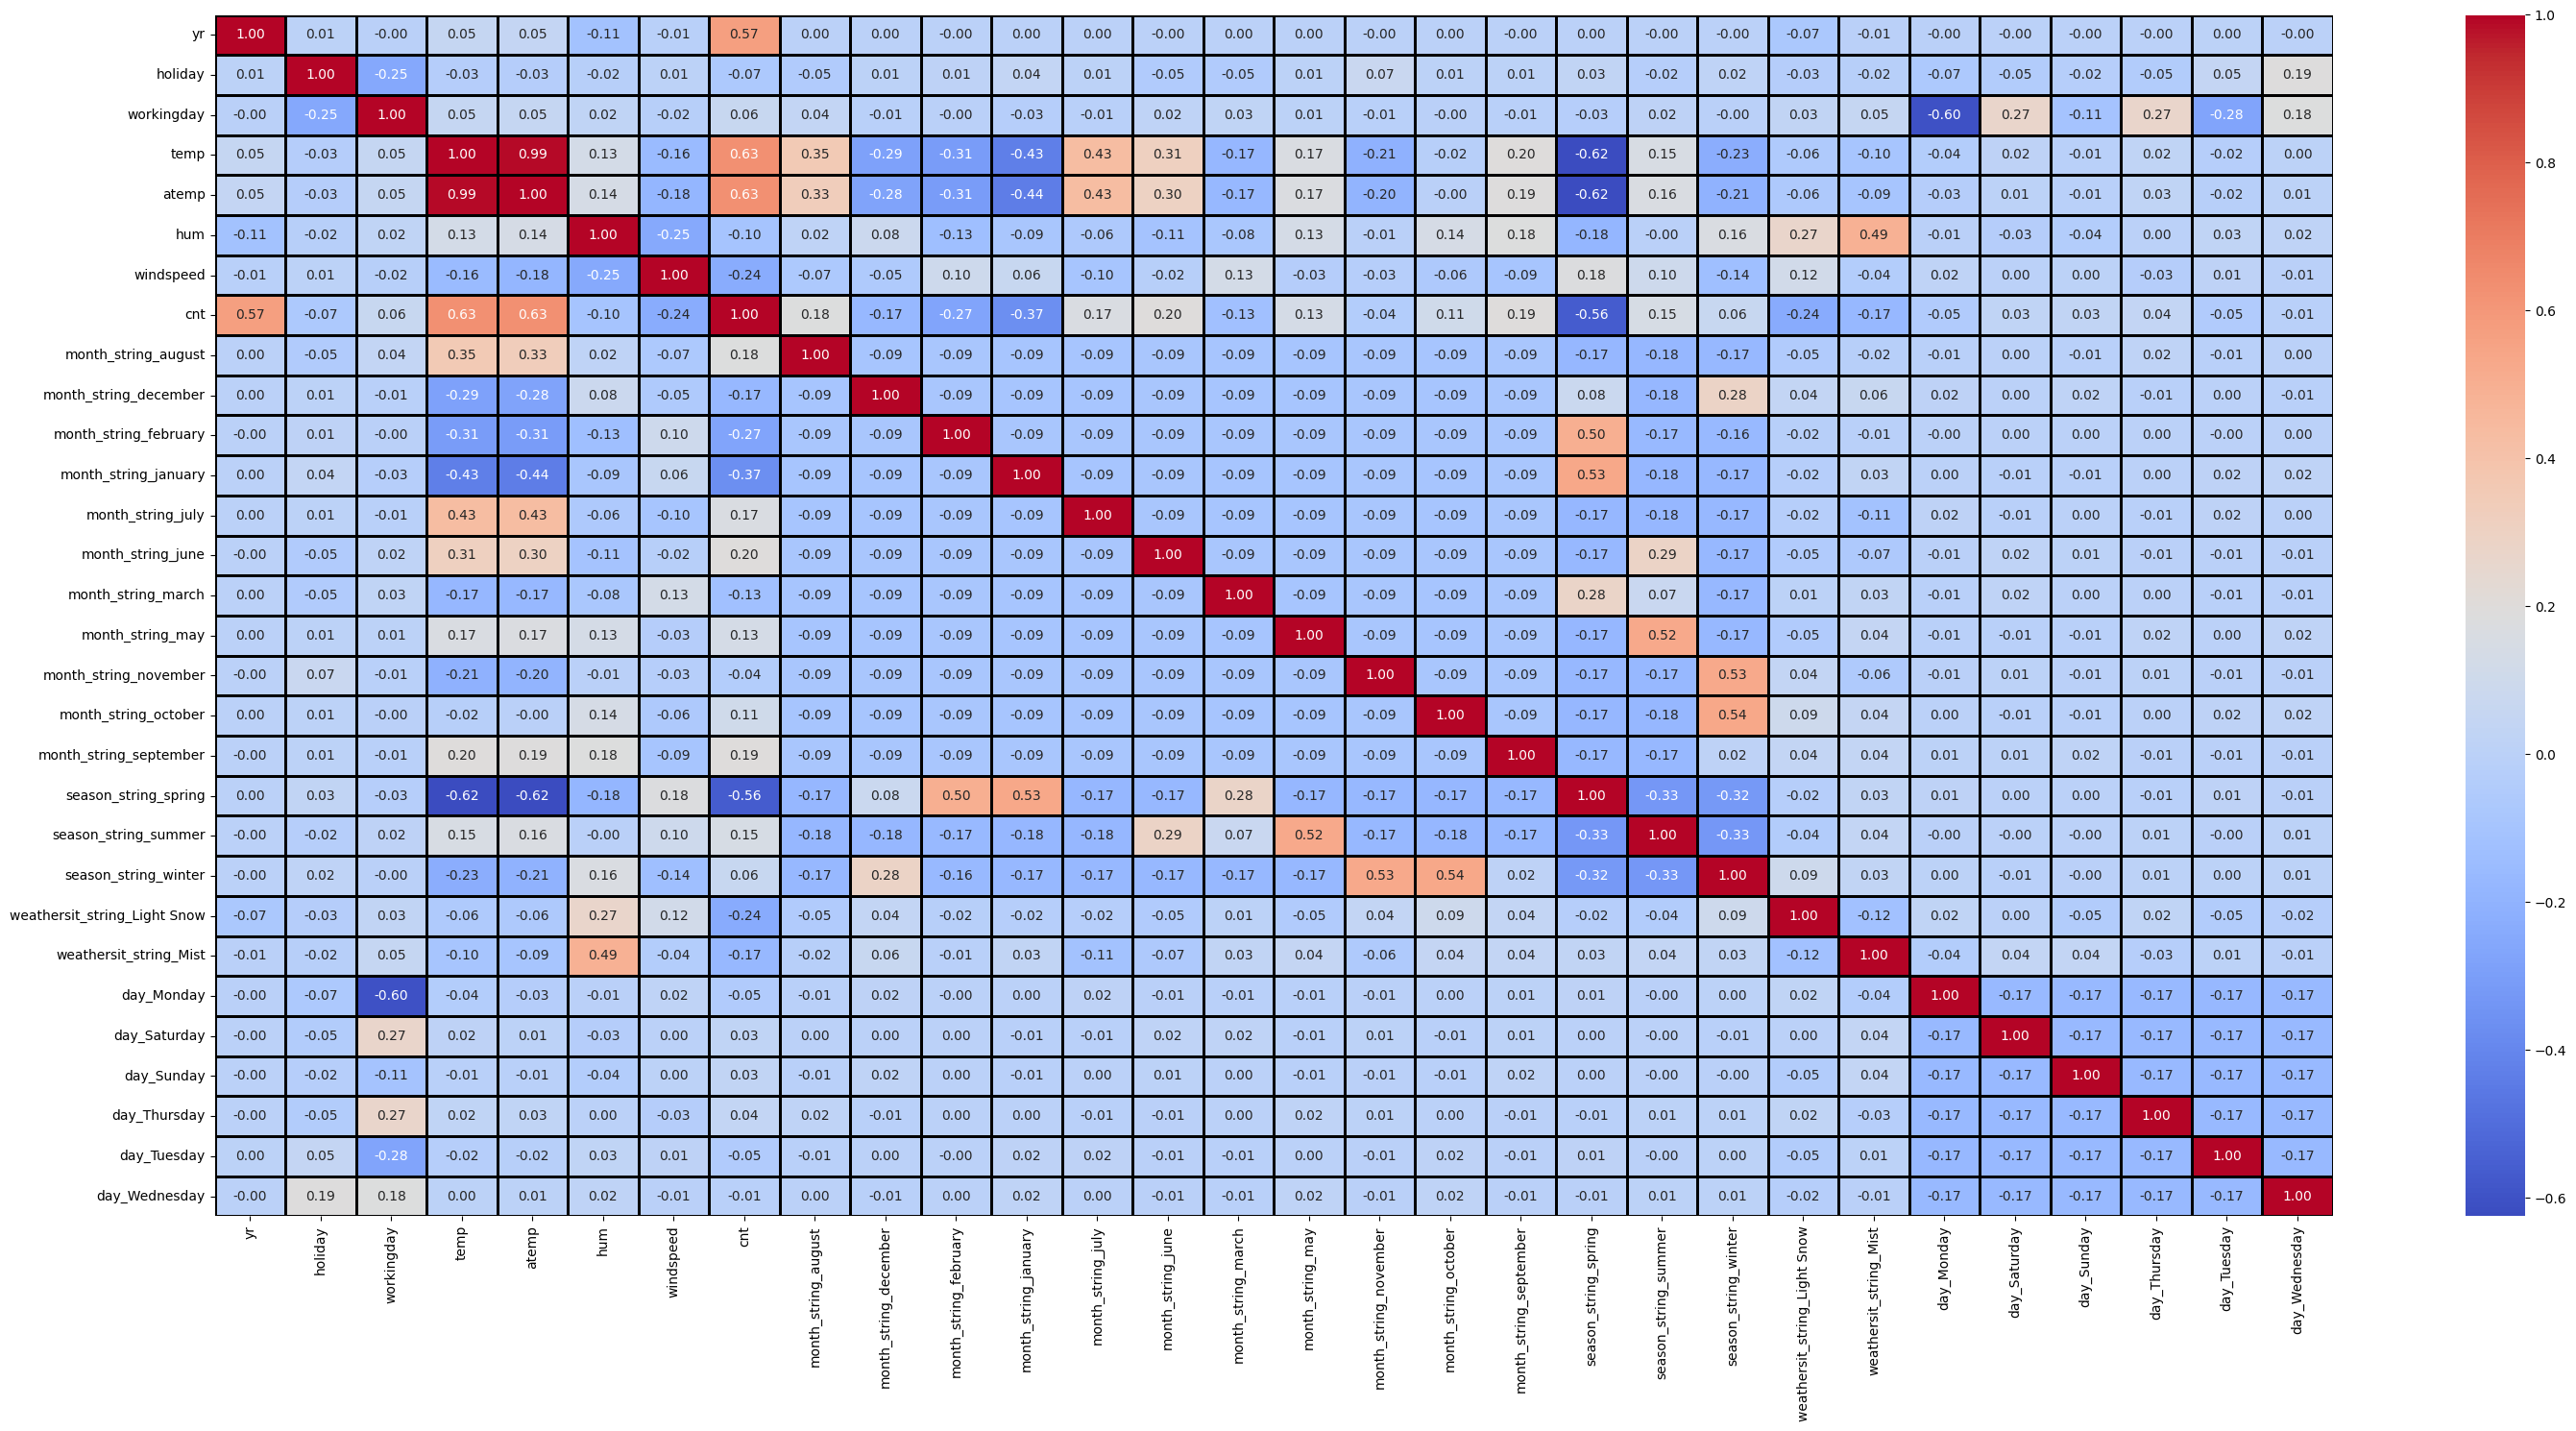

In [33]:
# Check for feature correlation 

plt.figure(figsize=(30,15))
correlation = bike_sharing_dummies.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt='.2f',linecolor='black',linewidths=0.8)
plt.tight_layout()
plt.show()


## **Inference**

- As from heatmap (pearson correlation) - I can say that features like year, temp, atemp and some of months features are positively correlated with our target variable.
- Also, spring_season shows a negative correlation with the target variable 
- Some features are also showing correlation with each other like temp-atemp , day_monday-workingday, spring-temp etc

## **Train Test Spliting**

In [34]:
train_data , test_data = train_test_split(bike_sharing_dummies,train_size=0.7,random_state=42)

In [35]:
train_data.shape

(510, 30)

In [36]:
test_data.shape

(220, 30)

## **Scaling**

In [37]:
scaler_normalized = MinMaxScaler()

In [38]:
# Applying scaling to all features except dummies created and categorical(binary) features i.e applying scaling only on continous features
continous_features = ['cnt','hum','windspeed','temp','atemp']
train_data[continous_features] = scaler_normalized.fit_transform(train_data[continous_features])
test_data[continous_features] = scaler_normalized.transform(test_data[continous_features])

In [39]:
train_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month_string_august,month_string_december,...,season_string_summer,season_string_winter,weathersit_string_Light Snow,weathersit_string_Mist,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,1,0,1,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,0,...,1,0,0,0,0,0,0,0,0,1
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,1,...,0,0,0,1,0,0,0,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,1,0,1,0,0,0,1,0,0
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
test_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,month_string_august,month_string_december,...,season_string_summer,season_string_winter,weathersit_string_Light Snow,weathersit_string_Mist,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,0,...,1,0,0,0,0,0,1,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,0,...,1,0,0,0,0,0,0,0,1,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,0,1,0,0,0,0,0,0,1,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,0,1,...,0,0,0,1,0,1,0,0,0,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
X_train = train_data.drop('cnt',axis=1)
y_train  = train_data['cnt']

## **Feature Selection**

- I will use hybrid approach to select features.
1. RFE to select top 15 features 
2. Eliminate features based on p_value(significance) and Variance Inflation Factor (VIF)

In [42]:
rfe = RFE(estimator=LinearRegression(),n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(14)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('month_string_august', np.False_, np.int64(12)),
 ('month_string_december', np.True_, np.int64(1)),
 ('month_string_february', np.False_, np.int64(8)),
 ('month_string_january', np.False_, np.int64(11)),
 ('month_string_july', np.True_, np.int64(1)),
 ('month_string_june', np.False_, np.int64(9)),
 ('month_string_march', np.True_, np.int64(1)),
 ('month_string_may', np.False_, np.int64(2)),
 ('month_string_november', np.True_, np.int64(1)),
 ('month_string_october', np.False_, np.int64(3)),
 ('month_string_september', np.True_, np.int64(1)),
 ('season_string_spring', np.True_, np.int64(1)),
 ('season_string_summer', np.False_, np.int64(7)),
 ('season_string_winter', np.True_, np.int64(1)),
 ('weathersit_string_Light Snow', np.True_, np.

In [44]:
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'month_string_december', 'month_string_july', 'month_string_march',
       'month_string_november', 'month_string_september',
       'season_string_spring', 'season_string_winter',
       'weathersit_string_Light Snow', 'weathersit_string_Mist'],
      dtype='object')

In [45]:
X_train = X_train[rfe_features]
X_train.shape

(510, 15)

## Training a model-1 using statsmodels considering top 15 features based on RFE

In [46]:
#  adding constant to input
train_model1 = sm.add_constant(X_train)
train_model1.sample()

,const,yr,holiday,temp,atemp,hum,windspeed,month_string_december,month_string_july,month_string_march,month_string_november,month_string_september,season_string_spring,season_string_winter,weathersit_string_Light Snow,weathersit_string_Mist
592,1.0,1,0,0.822438,0.755577,0.534994,0.299071,0,0,0,0,0,0,0,0,0


In [47]:
model1 = sm.OLS(y_train,train_model1).fit()
# getting summary of model1 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          8.76e-186
Time:                        02:54:43   Log-Likelihood:                 485.18
No. Observations:                 510   AIC:                            -938.4
Df Residuals:                     494   BIC:                            -870.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3358      0.037      9.138      0.000       0.264       0.408
yr                               0.2371      0.009     27.714      0.000       0.220       0.254
holiday                         -0.0704      0.026     -2.707      0.007      -0.121      -0.019
temp                             0.0621      0.245      0.254      0.800      -0.419       0.543
atemp                            0.4026      0.262      1.538      0.125      -0.112       0.917
hum                             -0.1654      0.040     -4.102      0.000      -0.245      -0.086
windspeed                       -0.1150      0.026     -4.461      0.000      -0.166      -0.064
month_string_december           -0.0622      0.018     -3.424      0.001      -0.098      -0.027
month_string_july               -0.0590      0.017     -3.480      0.001      -0.092      -0.026
month_string_march               0.0476      0.018      2.598      0.010       0.012       0.084
month_string_november           -0.0831      0.019     -4.323      0.000      -0.121      -0.045
month_string_september           0.0560      0.016      3.564      0.000       0.025       0.087
season_string_spring            -0.1564      0.017     -9.196      0.000      -0.190      -0.123
season_string_winter             0.0893      0.014      6.195      0.000       0.061       0.118
weathersit_string_Light Snow    -0.2197      0.029     -7.667      0.000      -0.276      -0.163
weathersit_string_Mist          -0.0583      0.011     -5.213      0.000      -0.080      -0.036
==============================================================================
Omnibus:                       74.780   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.256
Skew:                          -0.806   Prob(JB):                     4.32e-35
Kurtosis:                       5.202   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Inference**

- As I am getting R2 Score of 84% 
- But I can see two features are temp, atemp are showing p_value>0.05 so I will check multicollinearity and decide

## **Computing VIF**

In [48]:
#  Create a Dataframe that will contain the names of all the features variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,atemp,1230.20
2,temp,1200.70
4,hum,25.41
5,windspeed,5.34
12,season_string_winter,2.74
11,season_string_spring,2.74
14,weathersit_string_Mist,2.27
0,yr,2.09
9,month_string_november,1.82
7,month_string_july,1.49


## **Inference**

- Decided to drop `atemp` variable as VIF and p_value both are high

In [49]:
X_train = X_train.drop(['atemp'],axis=1)

## Training a model-2 using statsmodels considering 14 features

In [50]:
#  adding constant to input
train_model2 = sm.add_constant(X_train)
train_model2.sample()

,const,yr,holiday,temp,hum,windspeed,month_string_december,month_string_july,month_string_march,month_string_november,month_string_september,season_string_spring,season_string_winter,weathersit_string_Light Snow,weathersit_string_Mist
416,1.0,1,0,0.284966,0.612467,0.459174,0,0,0,0,0,1,0,0,0


In [51]:
model2 = sm.OLS(y_train,train_model2).fit()
# getting summary of model2 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          2.05e-186
Time:                        02:54:43   Log-Likelihood:                 483.96
No. Observations:                 510   AIC:                            -937.9
Df Residuals:                     495   BIC:                            -874.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3431      0.036      9.403      0.000       0.271       0.415
yr                               0.2371      0.009     27.685      0.000       0.220       0.254
holiday                         -0.0729      0.026     -2.807      0.005      -0.124      -0.022
temp                             0.4347      0.035     12.481      0.000       0.366       0.503
hum                             -0.1584      0.040     -3.948      0.000      -0.237      -0.080
windspeed                       -0.1250      0.025     -5.008      0.000      -0.174      -0.076
month_string_december           -0.0616      0.018     -3.385      0.001      -0.097      -0.026
month_string_july               -0.0596      0.017     -3.510      0.000      -0.093      -0.026
month_string_march               0.0501      0.018      2.743      0.006       0.014       0.086
month_string_november           -0.0833      0.019     -4.328      0.000      -0.121      -0.045
month_string_september           0.0538      0.016      3.432      0.001       0.023       0.085
season_string_spring            -0.1587      0.017     -9.361      0.000      -0.192      -0.125
season_string_winter             0.0908      0.014      6.306      0.000       0.063       0.119
weathersit_string_Light Snow    -0.2262      0.028     -7.973      0.000      -0.282      -0.170
weathersit_string_Mist          -0.0598      0.011     -5.364      0.000      -0.082      -0.038
==============================================================================
Omnibus:                       71.955   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.624
Skew:                          -0.782   Prob(JB):                     1.96e-33
Kurtosis:                       5.154   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#  Create a Dataframe that will contain the names of all the features variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,23.85
2,temp,16.94
4,windspeed,5.08
10,season_string_spring,2.74
11,season_string_winter,2.71
13,weathersit_string_Mist,2.23
0,yr,2.09
8,month_string_november,1.82
6,month_string_july,1.49
5,month_string_december,1.37


## **Inference**

- Decided to drop `hum` variable as VIF are high (>5)

In [53]:
X_train = X_train.drop(['hum'],axis=1)

## Training a model-3 using statsmodels considering 13 features

In [54]:
#  adding constant to input
train_model3 = sm.add_constant(X_train)
train_model3.sample()

,const,yr,holiday,temp,windspeed,month_string_december,month_string_july,month_string_march,month_string_november,month_string_september,season_string_spring,season_string_winter,weathersit_string_Light Snow,weathersit_string_Mist
506,1.0,1,0,0.692641,0.239888,0,0,0,0,0,0,0,0,1


In [55]:
model3 = sm.OLS(y_train,train_model3).fit()
# getting summary of model3 
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.6
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          2.99e-184
Time:                        02:54:43   Log-Likelihood:                 476.05
No. Observations:                 510   AIC:                            -924.1
Df Residuals:                     496   BIC:                            -864.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2503      0.028      8.838      0.000       0.195       0.306
yr                               0.2418      0.009     28.100      0.000       0.225       0.259
holiday                         -0.0743      0.026     -2.819      0.005      -0.126      -0.023
temp                             0.4111      0.035     11.809      0.000       0.343       0.479
windspeed                       -0.0961      0.024     -3.968      0.000      -0.144      -0.049
month_string_december           -0.0661      0.018     -3.587      0.000      -0.102      -0.030
month_string_july               -0.0539      0.017     -3.142      0.002      -0.088      -0.020
month_string_march               0.0544      0.019      2.941      0.003       0.018       0.091
month_string_november           -0.0836      0.020     -4.282      0.000      -0.122      -0.045
month_string_september           0.0478      0.016      3.019      0.003       0.017       0.079
season_string_spring            -0.1616      0.017     -9.403      0.000      -0.195      -0.128
season_string_winter             0.0854      0.015      5.872      0.000       0.057       0.114
weathersit_string_Light Snow    -0.2726      0.026    -10.405      0.000      -0.324      -0.221
weathersit_string_Mist          -0.0852      0.009     -9.233      0.000      -0.103      -0.067
==============================================================================
Omnibus:                       70.059   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.029
Skew:                          -0.753   Prob(JB):                     1.60e-33
Kurtosis:                       5.199   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#  Create a Dataframe that will contain the names of all the features variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,5.43
3,windspeed,5.04
10,season_string_winter,2.36
0,yr,2.08
9,season_string_spring,1.82
7,month_string_november,1.78
12,weathersit_string_Mist,1.57
5,month_string_july,1.44
4,month_string_december,1.33
8,month_string_september,1.24


## **Inference**

- Based on VIF decided to drop `windspeed` as temp is very highly correlated 

In [57]:
X_train = X_train.drop(['windspeed'],axis=1)

## Training a model-4 using statsmodels considering 12 features

In [58]:
#  adding constant to input
train_model4 = sm.add_constant(X_train)
train_model4.sample()

,const,yr,holiday,temp,month_string_december,month_string_july,month_string_march,month_string_november,month_string_september,season_string_spring,season_string_winter,weathersit_string_Light Snow,weathersit_string_Mist
556,1.0,1,0,0.819323,0,1,0,0,0,0,0,0,0


In [59]:
model4 = sm.OLS(y_train,train_model4).fit()
# getting summary of model1 
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.4
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          4.64e-182
Time:                        02:54:44   Log-Likelihood:                 468.08
No. Observations:                 510   AIC:                            -910.2
Df Residuals:                     497   BIC:                            -855.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1951      0.025      7.794      0.000       0.146       0.244
yr                               0.2413      0.009     27.634      0.000       0.224       0.258
holiday                         -0.0705      0.027     -2.638      0.009      -0.123      -0.018
temp                             0.4319      0.035     12.370      0.000       0.363       0.501
month_string_december           -0.0600      0.019     -3.221      0.001      -0.097      -0.023
month_string_july               -0.0508      0.017     -2.918      0.004      -0.085      -0.017
month_string_march               0.0573      0.019      3.057      0.002       0.020       0.094
month_string_november           -0.0843      0.020     -4.258      0.000      -0.123      -0.045
month_string_september           0.0520      0.016      3.248      0.001       0.021       0.084
season_string_spring            -0.1575      0.017     -9.044      0.000      -0.192      -0.123
season_string_winter             0.0949      0.015      6.517      0.000       0.066       0.124
weathersit_string_Light Snow    -0.2870      0.026    -10.901      0.000      -0.339      -0.235
weathersit_string_Mist          -0.0856      0.009     -9.137      0.000      -0.104      -0.067
==============================================================================
Omnibus:                       74.302   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.083
Skew:                          -0.786   Prob(JB):                     2.34e-36
Kurtosis:                       5.291   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#  Create a Dataframe that will contain the names of all the features variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,2.99
9,season_string_winter,2.35
0,yr,2.07
6,month_string_november,1.74
11,weathersit_string_Mist,1.56
4,month_string_july,1.40
8,season_string_spring,1.40
3,month_string_december,1.33
7,month_string_september,1.23
5,month_string_march,1.17


In [61]:
X_train.columns

Index(['yr', 'holiday', 'temp', 'month_string_december', 'month_string_july',
       'month_string_march', 'month_string_november', 'month_string_september',
       'season_string_spring', 'season_string_winter',
       'weathersit_string_Light Snow', 'weathersit_string_Mist'],
      dtype='object')

In [62]:
list(zip(X_train.columns,model4.params))

[('yr', 0.1950921475746058),
 ('holiday', 0.24129983873714564),
 ('temp', -0.07050640598585975),
 ('month_string_december', 0.43192461983297437),
 ('month_string_july', -0.06000759169489503),
 ('month_string_march', -0.05077195981361701),
 ('month_string_november', 0.05734096026582328),
 ('month_string_september', -0.08433434598193533),
 ('season_string_spring', 0.05203499348899127),
 ('season_string_winter', -0.1574603642114168),
 ('weathersit_string_Light Snow', 0.09492417337489632),
 ('weathersit_string_Mist', -0.28703374924234437)]

## **Inference**

- Based on VIF and p_value also no feature eliminations required .
- Final Features (having adjusted R2 = 0.82 i.e. 82% of variance model is able to explain) are : 
- 
    - `['yr', 'holiday', 'temp', 'month_string_december', 'month_string_july',
       'month_string_march', 'month_string_november', 'month_string_september',
       'season_string_spring', 'season_string_winter',
       'weathersit_string_Light Snow', 'weathersit_string_Mist']`


# Using Sklearn to train Linear Regression Model on selected 12 features

In [63]:
X_train

,yr,holiday,temp,month_string_december,month_string_july,month_string_march,month_string_november,month_string_september,season_string_spring,season_string_winter,weathersit_string_Light Snow,weathersit_string_Mist
645,1,1,0.403972,0,0,0,0,0,0,1,0,1
163,0,0,0.717562,0,0,0,0,0,0,0,0,0
360,0,0,0.331287,1,0,0,0,0,1,0,0,1
640,1,0,0.745598,0,0,0,0,0,0,1,0,1
625,1,0,0.703024,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0.405237,0,0,1,0,0,1,0,0,0
106,0,0,0.495350,0,0,0,0,0,0,0,0,0
270,0,0,0.717562,0,0,0,0,1,0,1,0,1
435,1,0,0.507811,0,0,1,0,0,1,0,0,0


In [64]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
lr.intercept_

np.float64(0.1950921475746053)

In [66]:
lr.coef_

array([ 0.24129984, -0.07050641,  0.43192462, -0.06000759, -0.05077196,
        0.05734096, -0.08433435,  0.05203499, -0.15746036,  0.09492417,
       -0.28703375, -0.08557892])

In [67]:
X_train.columns

Index(['yr', 'holiday', 'temp', 'month_string_december', 'month_string_july',
       'month_string_march', 'month_string_november', 'month_string_september',
       'season_string_spring', 'season_string_winter',
       'weathersit_string_Light Snow', 'weathersit_string_Mist'],
      dtype='object')

# Validate the model on the training dataset 

In [68]:
y_train_pred = lr.predict(X_train)

# **Residual Analysis**

In [69]:
residuals = y_train - y_train_pred

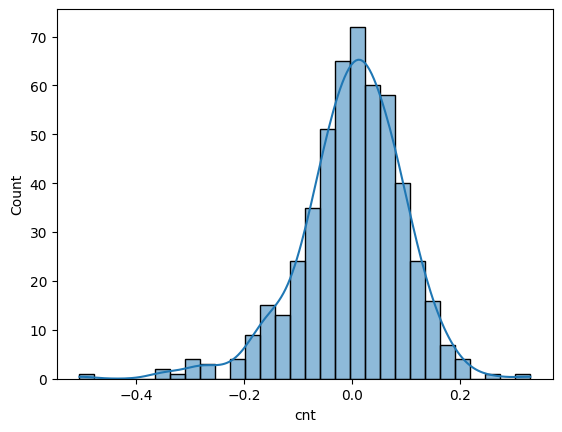

In [70]:
# checking distribution of residuals 

sns.histplot(residuals,kde=True)
plt.show()

## **Inference**

- The residuals are normally distributed . This proves our assumptions of errors are normally distributed.

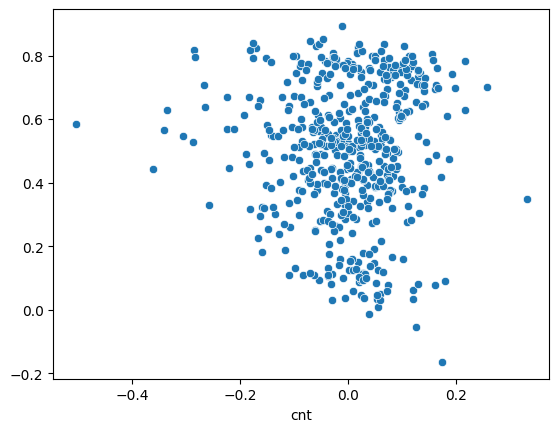

In [71]:
sns.scatterplot(x= residuals,y=y_train_pred)
plt.show()

## **Inference**

- The residuals are randomly scattered . This proves our assumptions of errors are independent.

# **Predictions and Evaluation on Test Data**

In [72]:
selected_features = ['yr', 'holiday', 'temp', 'month_string_december', 'month_string_july',
       'month_string_march', 'month_string_november', 'month_string_september',
       'season_string_spring', 'season_string_winter',
       'weathersit_string_Light Snow', 'weathersit_string_Mist','cnt']
test_data = test_data[selected_features]
test_data.shape

(220, 13)

In [73]:

X_test =test_data.drop(['cnt'],axis=1)
y_test = test_data['cnt']

In [74]:
y_test_pred = lr.predict(X_test)

In [75]:
r2_accuracy = r2_score(y_true=y_test,y_pred=y_test_pred)*100
r2_accuracy

80.85806756964989

## **Inference**

- `The R2 score for the test data is approximately 80.8%. This indicates that the model is able to explain 80.8% of the variance in the test data.`

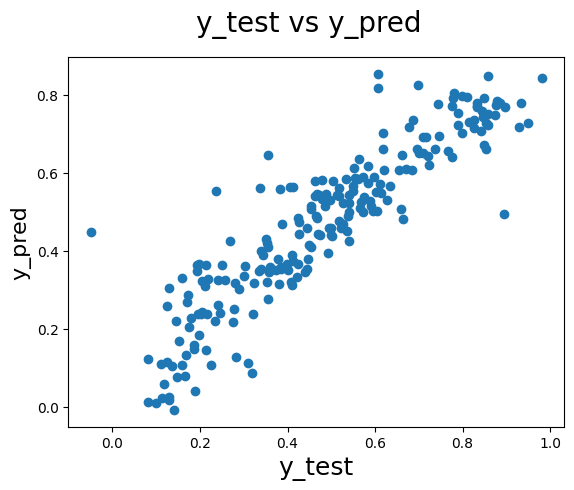

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()